In [28]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math 
import pandas as pd
plt.style.use('ggplot')



In [29]:
def set_ax_style(ax):
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

    for line in ax.get_xticklines() + ax.get_yticklines():
        line.set_linewidth(1.0)


    ticklabels = ax.get_xticklabels() + ax.get_yticklabels()   
    for label in ticklabels:
        label.set_fontsize(15)

# Resultados para um nó

In [45]:
names = ["Id", "Caso", "Tipo", "Processos/Threads" ,"TempoTotal", "TempoEncontrarMinimo", "TempoSincronizar", "TempoSwap", "Iteracoes", "CustoCalc", "CustoOtimo", "Lixo"]
data = pd.read_csv("NewResults/resultados_random_umno.txt", sep=";", header=None, names=names)
names = names[1:-1]
data = data[names]

In [46]:
data

,Caso,Tipo,Processos/Threads,TempoTotal,TempoEncontrarMinimo,TempoSincronizar,TempoSwap,Iteracoes,CustoCalc,CustoOtimo
0,../../ALL_tsp/att48.tsp,MPI,1,4.336914,4.159668,0.160400,0.103027,47,34233.095557,33523.708507
1,../../ALL_tsp/att48.tsp,OpenMP,1,3.977051,3.811035,0.131836,0.086670,43,34147.149110,33523.708507
2,../../ALL_tsp/att48.tsp,MPI,2,2.675049,2.077393,0.560547,0.097656,46,35096.683724,33523.708507
3,../../ALL_tsp/att48.tsp,OpenMP,2,2.262939,1.984863,0.246338,0.112305,43,34147.149110,33523.708507
4,../../ALL_tsp/att48.tsp,MPI,4,1.996094,1.093262,0.872314,0.094238,46,35096.683724,33523.708507
5,../../ALL_tsp/att48.tsp,OpenMP,4,1.375977,1.114014,0.241943,0.105225,46,34394.421043,33523.708507
6,../../ALL_tsp/att48.tsp,MPI,8,1.889893,0.569092,1.296143,0.107422,44,36957.643050,33523.708507
7,../../ALL_tsp/att48.tsp,OpenMP,8,1.105957,0.622070,0.466064,0.115967,46,34394.421043,33523.708507
8,../../ALL_tsp/att48.tsp,MPI,16,1.849854,0.359131,1.441895,0.095947,48,35827.511863,33523.708507
9,../../ALL_tsp/att48.tsp,OpenMP,16,51.144043,0.321289,50.785889,0.098145,42,34993.040583,33523.708507


In [47]:
data.Caso = data.Caso.apply(lambda x: x.split("/")[-1].split(".")[0])
data.Tipo = data.Tipo.apply(lambda x: x.strip())
casos = data.Caso.unique()
print casos
print names

['att48' 'rd100' 'pr1002' 'pcb442']
['Caso', 'Tipo', 'Processos/Threads', 'TempoTotal', 'TempoEncontrarMinimo', 'TempoSincronizar', 'TempoSwap', 'Iteracoes', 'CustoCalc', 'CustoOtimo']


In [48]:
mean_data = data.groupby(names[0:3], as_index=False).mean()
mean_data


,Caso,Tipo,Processos/Threads,TempoTotal,TempoEncontrarMinimo,TempoSincronizar,TempoSwap,Iteracoes,CustoCalc,CustoOtimo
0,att48,MPI,1,4.093823,3.932446,0.143799,0.088330,44.3,34817.695593,33523.708507
1,att48,MPI,2,2.515747,1.942529,0.549829,0.090796,42.9,35161.449339,33523.708507
2,att48,MPI,4,1.943286,1.048267,0.868091,0.090381,44.1,35021.863696,33523.708507
3,att48,MPI,8,1.936304,0.577026,1.330493,0.090430,44.6,35123.831301,33523.708507
4,att48,MPI,16,1.827661,0.351807,1.447583,0.097241,46.4,34902.876073,33523.708507
5,att48,OpenMP,1,4.198193,4.031738,0.136548,0.089966,45.4,34715.680978,33523.708507
6,att48,OpenMP,2,2.352978,2.063696,0.257349,0.113257,44.4,34772.452501,33523.708507
7,att48,OpenMP,4,1.350391,1.047241,0.276172,0.103906,42.7,34660.351277,33523.708507
8,att48,OpenMP,8,20.270532,0.582031,19.660449,0.109131,43.6,34710.272953,33523.708507
9,att48,OpenMP,16,17.666113,0.347070,17.285425,0.109033,45.0,34973.090194,33523.708507


In [49]:
results={}

for caso in mean_data["Caso"].unique():
    results[caso] = pd.DataFrame(mean_data[mean_data.Caso == caso])

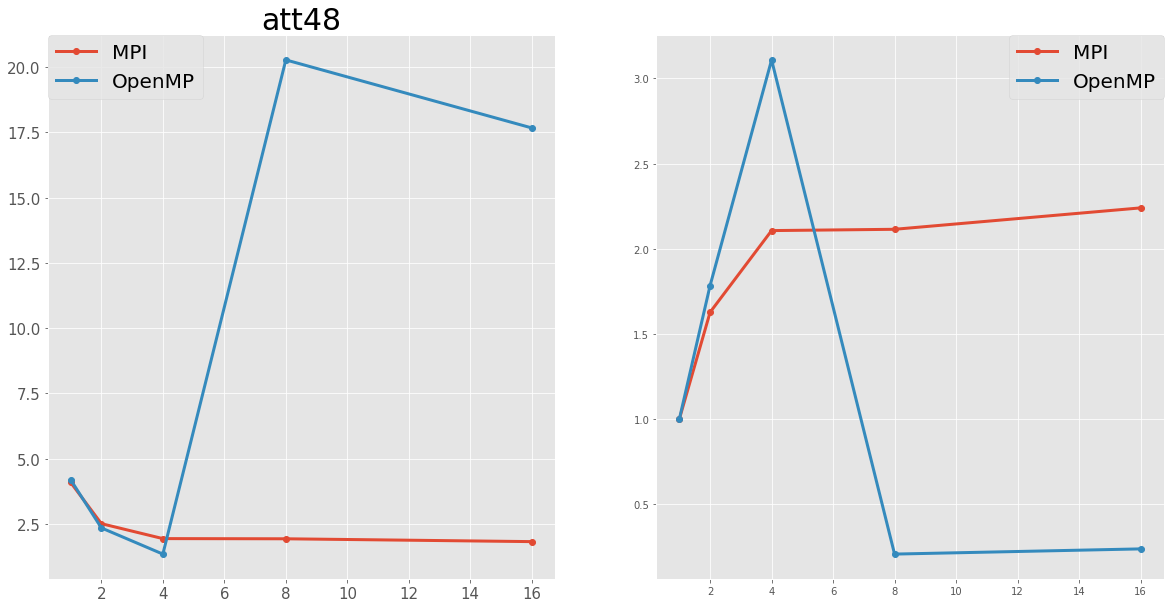

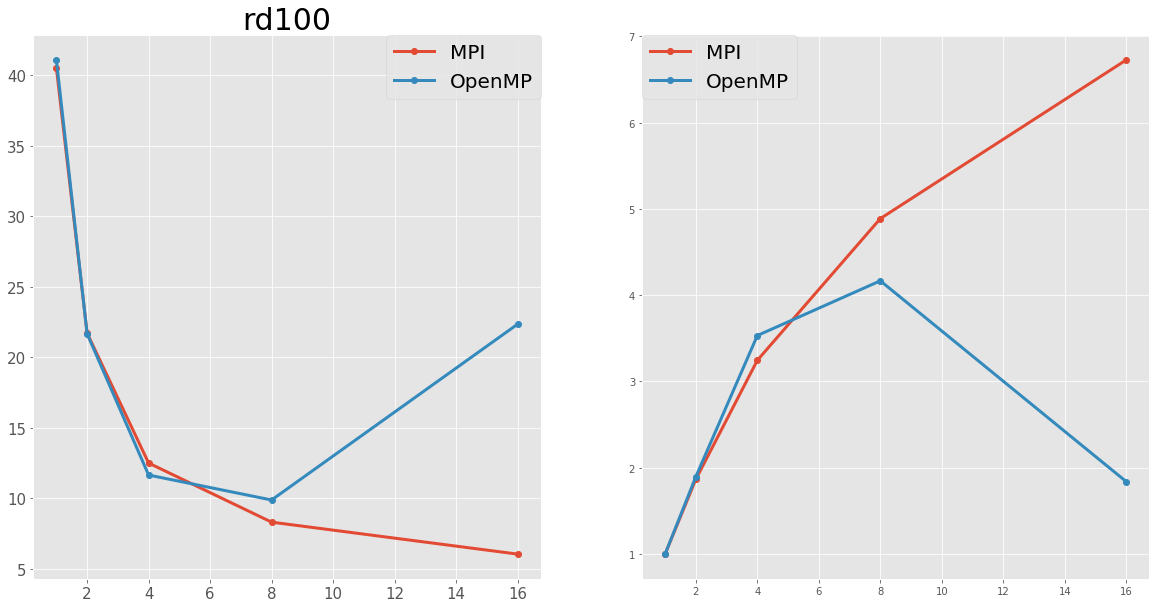

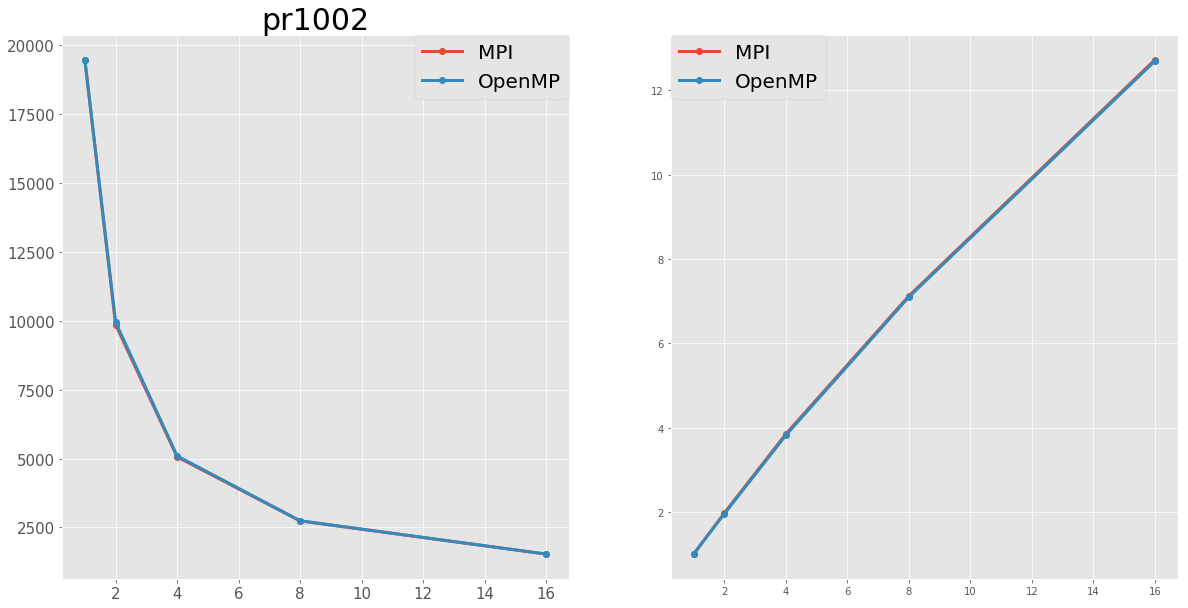

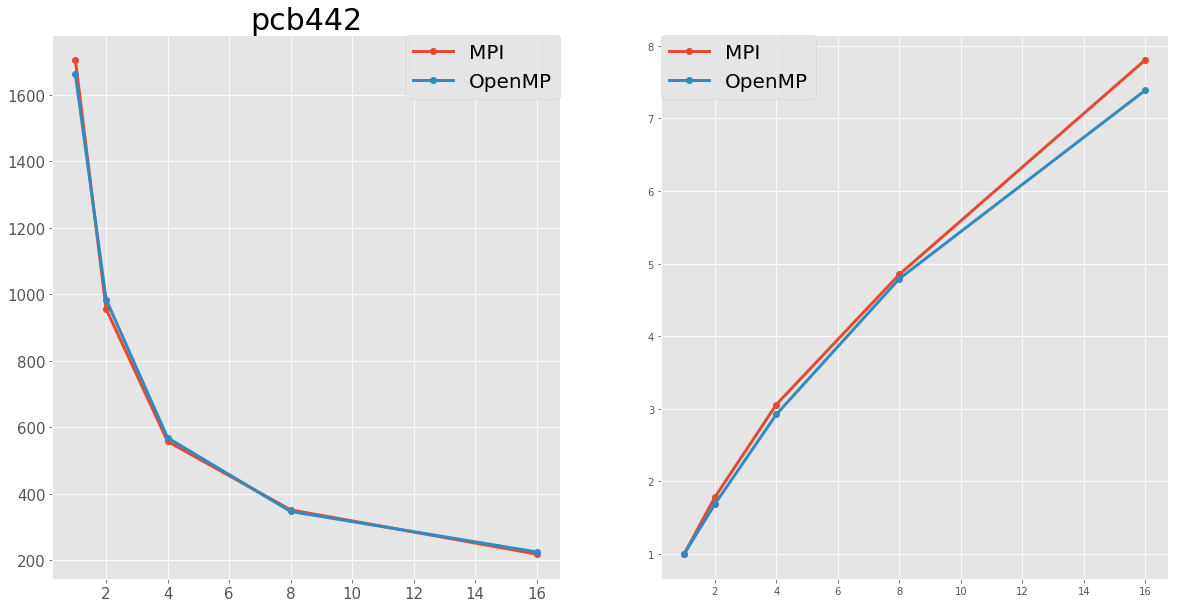

In [50]:
for i, caso in enumerate(casos):
    r = results[caso]
    fig, axis = plt.subplots(1,2, figsize=(20,10))
    set_ax_style(axis[0])
    
    procs = r[r.Tipo=="MPI"]["Processos/Threads"]
    tempoMPI = np.array(r[r.Tipo=="MPI"]["TempoTotal"])
    speedUpMPI = np.power(np.array(tempoMPI),-1)*tempoMPI[0]
    tempoOpenMP = np.array(r[r.Tipo=="OpenMP"]["TempoTotal"])
    speedUpOpenMP = np.power(np.array(tempoOpenMP),-1)*tempoOpenMP[0]
    
    
    axis[0].plot(procs, tempoMPI, marker="o",lw=3, label="MPI")
    axis[1].plot(procs, speedUpMPI, marker="o",lw=3, label="MPI")
    axis[0].plot(procs, tempoOpenMP, marker="o", lw=3, label="OpenMP")
    axis[1].plot(procs, speedUpOpenMP, marker="o", lw=3, label="OpenMP")
    axis[0].legend(borderaxespad=0., fontsize=20)
    axis[1].legend(borderaxespad=0., fontsize=20)
    axis[0].set_title(caso, fontsize=30)
    
    